In [94]:
from matplotlib import pyplot as plt
from math import log2
import numpy as np

In [95]:
def round_to_time_values(data):
    time_values = np.array([30, 60, 120, 240, 480, 1200, 7200])
    for i in range(data.shape[0]):
        data[i, 0] = time_values[time_values < data[i, 0]][-1]
    return data

In [96]:
dwave_data_k51 = np.array([
	[240, -103], 
	[240, -96], 
	[240, -99], 
	[240, -97], 
	[240, -98], 
	[240, -95], 
	[240, -99], 
	[240, -97], 
	[240, -101], 
	[240, -101], 
	[480, -99], 
	[480, -104], 
	[480, -99], 
	[480, -97], 
	[480, -97], 
	[480, -99], 
	[480, -99], 
	[480, -103], 
	[480, -97], 
	[480, -99], 
	[960, -97], 
	[960, -103], 
	[960, -99], 
	[960, -99], 
	[960, -101], 
	[960, -101], 
	[960, -99], 
	[960, -104], 
	[960, -101], 
	[960, -103]
])

In [97]:
dwave_data_k61 = np.array([
	[120, -83], 
	[120, -89], 
	[120, -83], 
	[120, -83], 
	[120, -84], 
	[240, -91], 
	[240, -85], 
	[240, -85], 
	[240, -86], 
	[240, -88], 
	[480, -87], 
	[480, -90], 
	[480, -86], 
	[480, -89], 
	[480, -87], 
	[960, -86], 
	[960, -88], 
	[960, -90], 
	[960, -88], 
	[960, -87], 
	[1920, -90], 
	[1920, -88], 
	[1920, -89], 
	[1920, -88], 
	[1920, -88], 
	[240, -85], 
	[240, -85], 
	[240, -91], 
	[240, -88], 
	[240, -88], 
	[480, -87], 
	[480, -88], 
	[480, -89], 
	[480, -87], 
	[480, -91]
])

In [98]:
dwave_data_k71 = np.array([
	[30, -81], 
	[30, -78], 
	[30, -79], 
	[30, -78], 
	[30, -76], 
	[30, -74], 
	[30, -79], 
	[60, -81], 
	[60, -81], 
	[60, -78], 
	[60, -79], 
	[60, -78], 
	[60, -84], 
	[60, -78], 
	[60, -75], 
	[60, -80], 
	[60, -78], 
	[120, -75], 
	[120, -81], 
	[120, -79], 
	[120, -79], 
	[120, -80], 
	[120, -80], 
	[120, -79], 
	[120, -82], 
	[240, -79], 
	[240, -80], 
	[240, -81], 
	[240, -82], 
	[240, -80], 
	[240, -81], 
	[240, -79], 
	[240, -80], 
	[240, -81], 
	[240, -81], 
	[480, -81], 
	[480, -81],
	[480, -80],
	[480, -82],
	[480, -83]
])

In [145]:
mqlib_data_k71 = np.array([
    [1920, -80],
    [240, 3],
    [60, 3],
    [7680, -79],
    [240, 4],
    [960, 2],
    [240, 3],
    [1920, -79],
    [480, -81],
    [480, 3],
    [480, 7],
    [30, 90],
    [480, -84],
    [60, 11],
    [7680, -81],
    [480, -77],
    [240, 3],
    [30, 8],
    [30, 8],
    [960, -76],
    [30, 12],
    [7680, -79],
    [7680, -75],
    [3840, -81],
    [960, 3],
    [3840, -79],
    [240, 2],
    [960, -79],
    [1920, -79],
    [60, 8],
    [240, 4],
    [120, 7],
    [1920, -81],
    [120, 4],
    [7680, -75],
    [60, 91],
    [480, 3],
    [960, 3],
    [960, -76],
    [480, 5],
    [120, 4],
    [30, 13],
    [3840, -79],
    [7680, -80],
    [960, -77],
    [960, 3],
    [7680, -79],
    [1920, -79],
    [480, -78],
    [3840, -79],
    [120, 6],
    [240, 5],
    [480, 4],
    [120, 8],
    [30, 11],
    [60, 91],
    [60, 8],
    [120, 3],
    [1920, -79],
    [3840, -75],
    [60, 3],
    [60, 11],
    [1920, -79],
    [3840, -77],
    [7680, -79],
    [480, -84],
    [120, 7],
    [3840, -77],
    [1920, 2],
    [960, -76],
    [3840, -75],
    [960, -77],
    [240, 3],
    [30, 8],
    [3840, -75],
    [240, 6],
    [60, 7],
    [30, 90],
    [30, 90],
    [120, 7],
    [1920, -79],
    [7680, -79],
    [30, 8],
    [120, 3],
    [3840, -79],
    [120, 6],
    [60, 10],
    [1920, -79],
    [7680, -83],
    [240, 5]
])
mqlib_data_k71 = np.array(sorted(mqlib_data_k71, key=lambda e: e[0]))


In [146]:
gurobi_data_k71 = np.array([
	[ -72.0, 7224 ], 
	[ 6.0, 77 ], 
	[ 92.0, 76 ], 
	[ 91.0, 46 ], 
	[ 6.0, 75 ], 
	[ 177.0, 164 ], 
	[ 6.0, 149 ], 
	[ 91.0, 41 ], 
	[ 91.0, 41 ], 
	[ 6.0, 87 ], 
	[ 91.0, 86 ], 
	[ 91.0, 1213 ], 
	[ 91.0, 53 ], 
	[ 16.0, 170 ], 
	[ 10.0, 146 ], 
	[ 10.0, 156 ], 
	[ 10.0, 41 ], 
	[ 6.0, 79 ], 
	[ 89.0, 164 ], 
	[ 10.0, 44 ], 
	[ 10.0, 156 ], 
	[ 91.0, 1221 ], 
	[ 6.0, 56 ], 
	[ 16.0, 49 ], 
	[ -81.0, 7215 ], 
	[ 89.0, 73 ], 
	[ 16.0, 79 ], 
	[ 6.0, 73 ], 
	[ 10.0, 50 ], 
	[ 91.0, 86 ], 
	[ 92.0, 150 ], 
	[ 91.0, 172 ], 
	[ 91.0, 79 ], 
	[ 10.0, 157 ], 
	[ 91.0, 1216 ]
])
gurobi_data_k71[:, [0, 1]] = gurobi_data_k71[:, [1, 0]]
gurobi_data_k71 = round_to_time_values(gurobi_data_k71)
gurobi_data_k71 = np.array(sorted(gurobi_data_k71, key=lambda e: e[0]))

In [147]:
def plot_qubo_data(*args):
    min_val = min(np.min(arg[:, 1]) for arg in args) - 1
    colours = ['blue', 'orange', 'gold']
    names = ['D-Wave', 'Gurobi', 'MQLib']
    for idx, data in enumerate(args):
        data_with_marker = np.zeros((data.shape[0], 3), dtype=int)
        data_with_marker[:, 0:2] = data
        data_set = set(tuple(data[i, :]) for i in range(data.shape[0]))
        counts = {data_point: sum(1 if tuple(data[i, :]) == data_point else 0 for i in range(data.shape[0])) for data_point in data_set}
        time_counts = {data_point[0]: sum(1 if data[i, 0] == data_point[0] else 0 for i in range(data.shape[0])) for data_point in data_set}
        for i in range(data.shape[0]):
            data_with_marker[i, 2] = 20 ** 2 * (counts[tuple(data[i, :])] / time_counts[data[i, 0]]) ** 2
            
        plt.scatter(np.log2(data_with_marker[:, 0] / 60), np.log2(data_with_marker[:, 1] - min_val), s=data_with_marker[:, 2], c=colours[idx], label=names[idx])
    plt.xlabel('log_2(T / 60)')
    plt.ylabel('log_2(Energy)')
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
    plt.grid(True, which="both")
    plt.show()

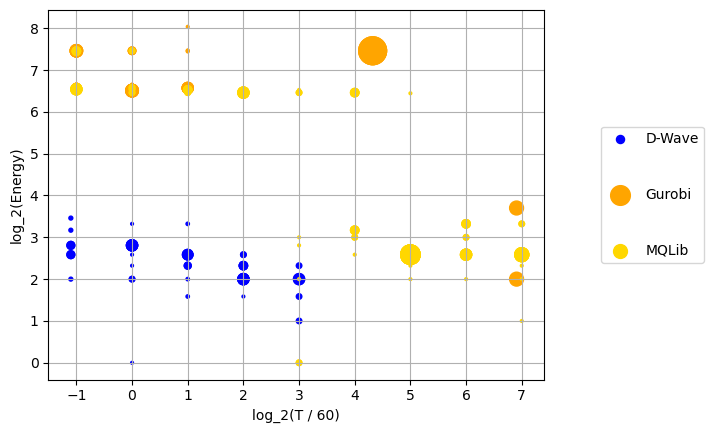

In [148]:
plot_qubo_data(dwave_data_k71, gurobi_data_k71, mqlib_data_k71)

In [125]:
min(np.min(arg[:, 1]) for arg in [dwave_data_k71])

-84.0

In [144]:
for i in range(30, mqlib_data_k71.shape[0]):
    print(mqlib_data_k71[i, :])
    

[240   3]
[240   4]
[240   3]
[240   3]
[240   2]
[240   4]
[240   5]
[240   3]
[240   6]
[240   5]
[480 -81]
[480   3]
[480 -84]
[480   3]
[480 -84]
[960   2]
[960 -76]
[960   3]
[960 -79]
[960   3]
[960 -76]
[960 -77]
[960   3]
[960 -76]
[960 -77]
